REF:
- articles
    - [1](https://towardsdatascience.com/linear-regression-from-scratch-cd0dee067f72)
    - [2](https://towardsdatascience.com/linear-regression-from-scratch-with-numpy-implementation-finally-8e617d8e274c)
    
- videos
    - [Coding Train](https://www.youtube.com/watch?v=L-Lsfu4ab74)
    - [Linear Regression and Multiple Regression](https://www.youtube.com/watch?v=K_EH2abOp00)
    
    
TODO:
- Gradient Descent
    - [Linear regression gradient descent](https://www.youtube.com/watch?v=WnqQrPNYz5Q)
    

# Linear

Recall that linear regression fits a model in the form:

$$ y=mx+b $$

or 

$$y=a0+a1x1+a2x2+a3x3+...+anxn$$

There are multiple ways of finding these coefficients by let us use **Ordinary Least Mean Square** approach.  The goal is finding a function with coefficients that minimize the error of our model. This line is the best fit that passes through most of the scatter points and also reduces error which is the distance from the point to the line itself.

The total error of the model is the sum of the error of each point

$$\sum_{n}^{i=1}r_i^2$$

where **r** are the distances between the line and the ith point.

The squaring procedure is to remove the ambiguity of the points being above or below the decision line.  We need to minimize the error or distances between the point and the line.

$$\beta_i = \frac{\sum_{i}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i}(x_i-\bar{x})^2} = m$$

This gets the slope of the regression line.  To find the bias you need to place it in equation 1 with x and y being the mean of the data points and solving for the bias.

$$\hat{\beta}_0 = \bar{y} - \bar{\beta}\bar{x}$$
OR
$$bias = \bar{y} - m\bar{x}$$



**In the previous section it was easier to see how the algorithm works each step and how they are calculated.  In this section we will use matrices instead and dot products to make our calculations easier and faster.**

# Imports

In [1]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

# I/O

This dataset is called **Boston house prices dataset** from sklearn.

The information about the dataset can be found [here](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)

| Number of Instances | 506 |
|----------------------|---------------------------------------------------------------------------------------|
| Number of Attributes | 13 |


Features
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per 10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in 1000

In [2]:
dataset = load_boston()

# Features of the houses
X = dataset.data
# Price of the houses
y = dataset.target[:,np.newaxis]

print("Total samples in our dataset is: {} and contains {} features".format(X.shape[0],X.shape[1]))
print("X type ={}\ny type = {} ".format(type(X),type(y)))

Total samples in our dataset is: 506 and contains 13 features
X type =<class 'numpy.ndarray'>
y type = <class 'numpy.ndarray'> 


The dataset are numpy arrays so let us treat them that way instead of python lists.

# Main Algo Matrix Approach

In the notes we use the RSS for the computation of residuals.  This makes the derivate calculations a little bit easier to see.  But for the purpose of this demonstration we use the MSE similar to the linear regression example.  We can take this further and also use the coefficient of Determination.  These are just various cost functions to identify the residuals.  Its these residuals we want to minimize using gradient decent.

In [3]:
def compute_cost(X, y, params):
    n_samples = len(y)
    h = X @ params
    return (1/(2*n_samples))*np.sum((h-y)**2)

In [4]:
def gradient_descent(X, y, params, learning_rate, n_iters):
    n_samples = len(y)
    J_history = np.zeros((n_iters,1))

    for i in range(n_iters):
        params = params - (learning_rate/n_samples) * X.T @ (X @ params - y) 
        J_history[i] = compute_cost(X, y, params)

    return (J_history, params)

In [5]:
# This will be a genera
def calcResiduals(X,y,B,costType='mse'):
    args = {'features':X,'outputs':Y,'coefficients':B}
    if costType == 'mse':
        residuals = calcMSE(args)
    else:
        print('So cost type = {}'.format(costType))
        return False
    return residuals

In [6]:
def calcMSE(argsMSE):
    # get variables
    X = argsMSE['features']
    y = argsMSE['outputs']
    B = argsMSE['coefficients']
    
    # by applying the dot product we are essesntially implying regression
    # note that we don't have to add b0 here for the bias like in the previous 
    # example rather we are placing that in the X as its own coloumns
    n = len(y)
    yHat = X.dot(B)
    
    mse = (1/(2*n_samples))*np.sum((y-yHat)**2)
    
    return mse    

In [7]:
def MYgradient_descent(X, y, B, learning_rate, n_iters,costType='mse'):
    nSamples = len(y)
    Jhistory = np.zeros((n_iters,1))

    for i in range(n_iters):
        B = B - (learning_rate/nSamples) * X.T.dot((X.dot(B) - y)) 
        J_history[i] = compute_cost(X, y, B)

    return (J_history, params)

In [58]:
def GradientDescent(X, y, B, learning_rate=1, n_iters=1,costType='mse'):
    print('Trying me NOW')
    nSamples = len(y)
    Jhistory = np.zeros((n_iters,1))
    Jcurrent = 0    
    Jpreviouse = 0
    
    for i in range(n_iters):
        B = B - (learning_rate/nSamples) * X.T.dot((X.dot(B) - y)) 
        Jhistory[i] = compute_cost(X, y, B)
        if i>1:            
            diff = Jhistory[i]-Jhistory[i-1]
            diff = np.abs(diff)
            print('the diff = {}'.format(diff[0]))
            if(diff[0]<0.001):                 
                print(n_iters)
                break
            else:
                continue

    return (J_history, params)

## Inits

In [9]:
# Get length of data
nSamples  = len(y)

# Get normalization
mu = np.mean(X, 0)
sigma = np.std(X, 0)
X = (X-mu) / sigma 
# You add a coloumn of ones here for the bias term.  
# In the notes this is because it should be a nx(p+1) matrix
X = np.hstack((np.ones((nSamples,1)),X))

# Get number of features
n_features = np.size(X,1)
# intialize the parameters to 0
# these are the coefficients of the model to find
params = np.zeros((n_features,1)) 

In [59]:
n_iters = 1500
learning_rate = 0.01

initial_cost = compute_cost(X, y, params)

print("Initial cost is: ", initial_cost, "\n")

(Jhistory, optimalparams) = GradientDescent(X, y, params, 
                                              learning_rate=0.01, 
                                              n_iters=10000)

Initial cost is:  296.0734584980237 

Trying me NOW
the diff = 6.630618133554549
the diff = 6.3531806698404125
the diff = 6.098419138316899
the diff = 5.863848309684045
the diff = 5.647273910162397
the diff = 5.446758148209284
the diff = 5.260589334265518
the diff = 5.087255107388671
the diff = 4.925418840374391
the diff = 4.773898845847896
the diff = 4.631650050657328
the diff = 4.497747845408497
the diff = 4.371373850806577
the diff = 4.251803373153109
the diff = 4.13839434838826
the diff = 4.030577597896752
the diff = 3.927848240292377
the diff = 3.8297581219024153
the diff = 3.7359091449763753
the diff = 3.645947387015383
the diff = 3.559557917277374
the diff = 3.4764602276758865
the diff = 3.3964042051185572
the diff = 3.3191665809989956
the diff = 3.2445478011914304
the diff = 3.1723692666245142
the diff = 3.102470900441176
the diff = 3.034709002976882
the diff = 2.9689543603922175
the diff = 2.9050905768540645
the diff = 2.8430126037337686
the diff = 2.78262544244501
the diff = 

the diff = 0.0012994925791911527
the diff = 0.001290261378423807
the diff = 0.0012811631179907579
the diff = 0.0012721953428052046
the diff = 0.0012633556457419814
the diff = 0.001254641666690759
the diff = 0.001246051091658984
the diff = 0.0012375816517984362
the diff = 0.0012292311225632346
the diff = 0.0012209973228163307
the diff = 0.0012128781139715272
the diff = 0.0012048713991283933
the diff = 0.001196975122303101
the diff = 0.00118918726754913
the diff = 0.0011815058582289595
the diff = 0.001173928956193393
the diff = 0.0011664546610337112
the diff = 0.001159081109353366
the diff = 0.001151806474005923
the diff = 0.0011446289633880724
the diff = 0.0011375468207610595
the diff = 0.0011305583235117211
the diff = 0.001123661782548524
the diff = 0.0011168555415590475
the diff = 0.0011101379764202335
the diff = 0.001103507494546463
the diff = 0.0010969625342571732
the diff = 0.0010905015641728966
the diff = 0.0010841230826201809
the diff = 0.001077825617038286
the diff = 0.001071607

In [51]:
Jhistory

array([[288.80830197],
       [281.87475513],
       [275.244137  ],
       ...,
       [ 11.00731137],
       [ 11.00722251],
       [ 11.00713381]])

In [44]:
np.abs(Jhistory[1]- Jhistory[0])[0]<0.0001

False

Initial cost is:  296.0734584980237 

Optimal parameters are: 
 [[22.53279993]
 [-0.83980839]
 [ 0.92612237]
 [-0.17541988]
 [ 0.72676226]
 [-1.82369448]
 [ 2.78447498]
 [-0.05650494]
 [-2.96695543]
 [ 1.80785186]
 [-1.1802415 ]
 [-1.99990382]
 [ 0.85595908]
 [-3.69524414]] 

Final cost is:  [11.00713381]


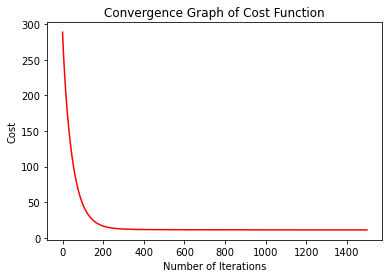

In [10]:
n_iters = 1500
learning_rate = 0.01

initial_cost = compute_cost(X, y, params)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) = gradient_descent(X, y, params, learning_rate, n_iters)

(J_history, optimal_params) = GradientDescent(X, y, params, 
                                              learning_rate=0.01, 
                                              n_iters=10000)


print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1])

plt.plot(range(len(J_history)), J_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

## Plotting

In [6]:
#plotting values 
x_max = np.max(X) + 100
x_min = np.min(X) - 100

#calculating line values of x and y
# generate x values using linsapce
xModelPoints = np.linspace(x_min, x_max, 1000)
# generate associated y values using model parameters
yModelPoints = bias + m * xModelPoints

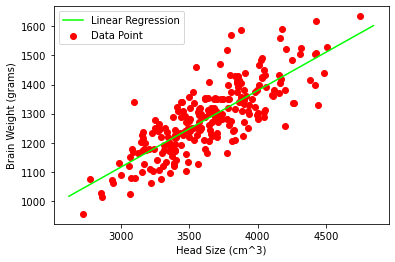

In [7]:
#plotting regression line
plt.plot(xModelPoints, yModelPoints, color='#00ff00', label='Linear Regression')
#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')
# x-axis label
plt.xlabel('Head Size (cm^3)')
#y-axis label
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()

## Measuring the error

There are two types we can calculate error

### Root mean squared errors
$$RMSE = \sqrt{\frac{1}{n}\sum_{n}^{j=1}(y_j-\hat{j}_j)^2}$$

In [8]:
myRMSE = 0 
for x,y in zip(X,Y):
    yPredict = bias + m*x
    myRMSE += (y-yPredict)**2
myRMSE = np.sqrt(myRMSE/n)
print(myRMSE)

72.1206213783709


### Root mean squared errors
$$R^2 = \frac{SSR}{SST}=\frac{\sum(\hat{y_i}-\bar{y})^2}{\sum(y_i-\bar{y})^2}$$

**SST** is the total sum of squares and **SSR** is the total sum of squares of residuals.

$R^2$ Score usually **ranges from 0 to 1**. It will also **become negative if the model is completely wrong**. Now we will find the $R^2$ Score.

In [9]:
SST = 0
SSR = 0
for x,y in zip(X,Y) :
    yPredict= bias + m * x
    SST += (y - y_mean) ** 2
    SSR += (y- yPredict) **2
    
score  = 1 - (SSR/SST)
print(score)

0.6393117199570003


# Main Algo Matrix Approach

In [ ]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt